<a href="https://colab.research.google.com/github/Ar-Sh-11/TSF_GRIP_MAY23/blob/main/_1_TSF_student_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing important and necessary packages for linear regression
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
#Load the dataset
input=pd.read_csv('http://bit.ly/w-data')


In [3]:
#view the dataset
input

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


View the statistics for data

In [4]:
input.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


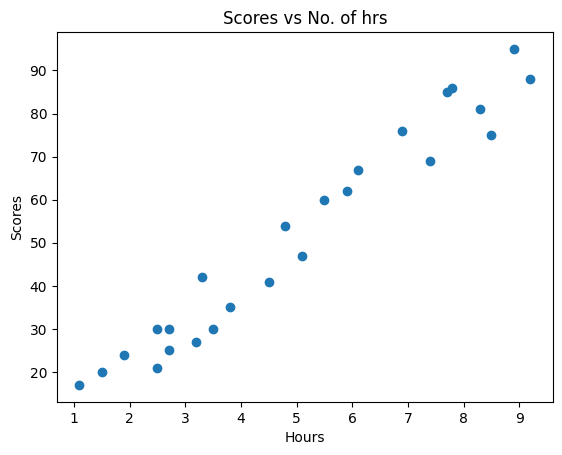

In [5]:
#plot data
plt.scatter(input['Hours'],input['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores vs No. of hrs')
plt.show()

In [6]:
#Apply Gradient Boosting Regressor from Scikit learn package
from sklearn.ensemble import GradientBoostingRegressor
grb_model=GradientBoostingRegressor(n_estimators=100, max_depth=8)


# create input data as a 2D array with one column
input_data = np.array(input['Hours']).reshape(-1, 1)

grb_model = GradientBoostingRegressor(n_estimators=100, max_depth=8)

# fit the model with the input data and target variable
grb_model.fit(input_data, input['Scores'])

# predict the score for a student who studies for 9.25 hours/day
pred_score = grb_model.predict([[9.25]])[0]

pred_score

87.99902997771264

In [7]:
# predict the scores for the input data
from sklearn.metrics import mean_squared_error
y_pred = grb_model.predict(input_data)

# calculate the mean squared error of the model
mse = mean_squared_error(input['Scores'], y_pred)

print("Mean Squared Error of the model is:", mse)


Mean Squared Error of the model is: 2.1200004315800722


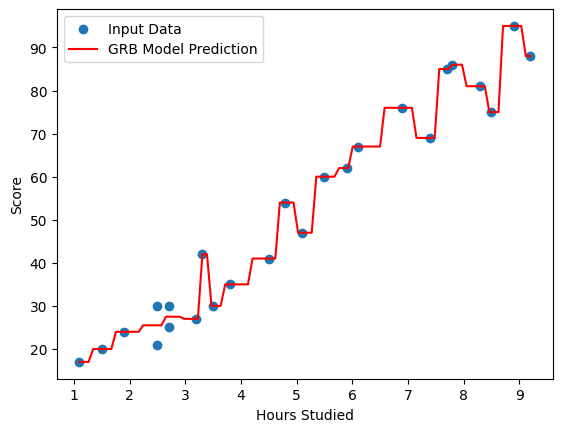

In [8]:
#plot the predicted vs observed data
plt.scatter(input['Hours'], input['Scores'], label='Input Data')
x=np.linspace(input_data.min(), input_data.max(), 100).reshape(-1,1)
y=grb_model.predict(x)
plt.plot(x,y, color='red', label='GRB Model Prediction')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.legend()
plt.show()